In [6]:
import keras
import tensorflow
import pandas as pd
import numpy as np
import tensorflow as tf
from numpy import loadtxt
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import adam_v2
from keras.layers import Dense, Dropout, Activation, Conv1D, Flatten, MaxPooling1D

### Loading and spilting the data 

In [7]:
train_data = loadtxt('train_data.csv', delimiter=',')

In [8]:
X_train_data = train_data[:,1:44]
y_train_data = train_data[:,0]

In [9]:
test_data = loadtxt('test_data.csv', delimiter=',')

In [10]:
X_test_data = test_data[:,1:44]
y_test_data = test_data[:,0]

### Building the moudel 

In [16]:
model = Sequential()
model.add(Dense(1024, input_dim=43, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Training

In [17]:
optimizer = adam_v2.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',  optimizer=optimizer  , metrics=['accuracy'])

In [18]:
history=model.fit(X_train_data, y_train_data, validation_split=0.10, epochs=100, batch_size=32)


Epoch 1/100
11/11 [==============================] - 1s 33ms/step - loss: 1.7856 - accuracy: 0.5031 - val_loss: 0.6827 - val_accuracy: 0.5897
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 0.8969 - accuracy: 0.5250 - val_loss: 0.8118 - val_accuracy: 0.4615
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7862 - accuracy: 0.4861 - val_loss: 0.6588 - val_accuracy: 0.5641
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 0.6820 - accuracy: 0.5554 - val_loss: 0.6721 - val_accuracy: 0.6154
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.7180 - accuracy: 0.5346 - val_loss: 0.6684 - val_accuracy: 0.5641
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6763 - accuracy: 0.5679 - val_loss: 0.6575 - val_accuracy: 0.5897
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6717 - accuracy: 0.5525 - val_loss: 0.7254 - val_accuracy: 0.5128
Epoch 8/100


Epoch 59/100
11/11 [==============================] - 0s 7ms/step - loss: 0.5007 - accuracy: 0.7662 - val_loss: 0.7396 - val_accuracy: 0.6923
Epoch 60/100
11/11 [==============================] - 0s 7ms/step - loss: 0.4737 - accuracy: 0.7960 - val_loss: 0.6413 - val_accuracy: 0.7436
Epoch 61/100
11/11 [==============================] - 0s 7ms/step - loss: 0.4856 - accuracy: 0.7764 - val_loss: 0.7004 - val_accuracy: 0.6923
Epoch 62/100
11/11 [==============================] - 0s 8ms/step - loss: 0.5191 - accuracy: 0.7193 - val_loss: 0.6756 - val_accuracy: 0.7179
Epoch 63/100
11/11 [==============================] - 0s 7ms/step - loss: 0.4836 - accuracy: 0.7587 - val_loss: 0.7374 - val_accuracy: 0.6923
Epoch 64/100
11/11 [==============================] - 0s 8ms/step - loss: 0.5164 - accuracy: 0.7162 - val_loss: 0.7752 - val_accuracy: 0.7692
Epoch 65/100
11/11 [==============================] - 0s 7ms/step - loss: 0.5000 - accuracy: 0.7587 - val_loss: 0.8172 - val_accuracy: 0.7179
Epoch 

In [19]:
_, accuracy = model.evaluate(X_train_data, y_train_data)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8368
Accuracy: 83.68


### Ploting the train accuracy along with validation accuracy 

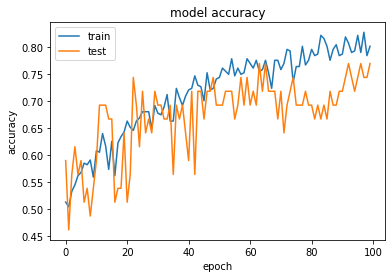

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Ploting the traing loss along with validation loss

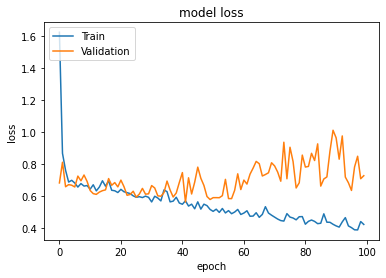

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save_weightss

### Making predections

In [ ]:

# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(500):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))